In [224]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [225]:
data = pd.read_csv("housing.csv")

In [226]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [227]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [228]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [229]:
from sklearn.model_selection import train_test_split

X = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

train_data = X_train.join(y_train)

train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
4956,-118.31,34.01,52.0,2547.0,475.0,1417.0,444.0,1.8214,<1H OCEAN,123200.0
1316,-121.80,38.00,34.0,2738.0,475.0,1316.0,459.0,3.5368,INLAND,122500.0
12567,-121.42,38.54,18.0,2525.0,501.0,1726.0,468.0,2.3980,INLAND,87600.0
3390,-118.35,34.21,39.0,1470.0,312.0,1047.0,284.0,3.2750,<1H OCEAN,181400.0
11867,-121.06,40.23,23.0,1127.0,225.0,215.0,85.0,3.4844,INLAND,143800.0
...,...,...,...,...,...,...,...,...,...,...
18985,-121.94,38.27,35.0,10869.0,2226.0,9879.0,2152.0,2.5681,INLAND,81300.0
9388,-122.51,37.89,27.0,2674.0,565.0,1233.0,547.0,3.4485,NEAR BAY,458300.0
9707,-121.65,36.67,52.0,2351.0,459.0,1169.0,439.0,2.8924,<1H OCEAN,169600.0
9029,-118.78,34.05,28.0,1343.0,215.0,487.0,199.0,6.8300,NEAR OCEAN,500001.0


In [230]:
train_data = X_train.join(y_train) # the result of this only shows the result of the training data



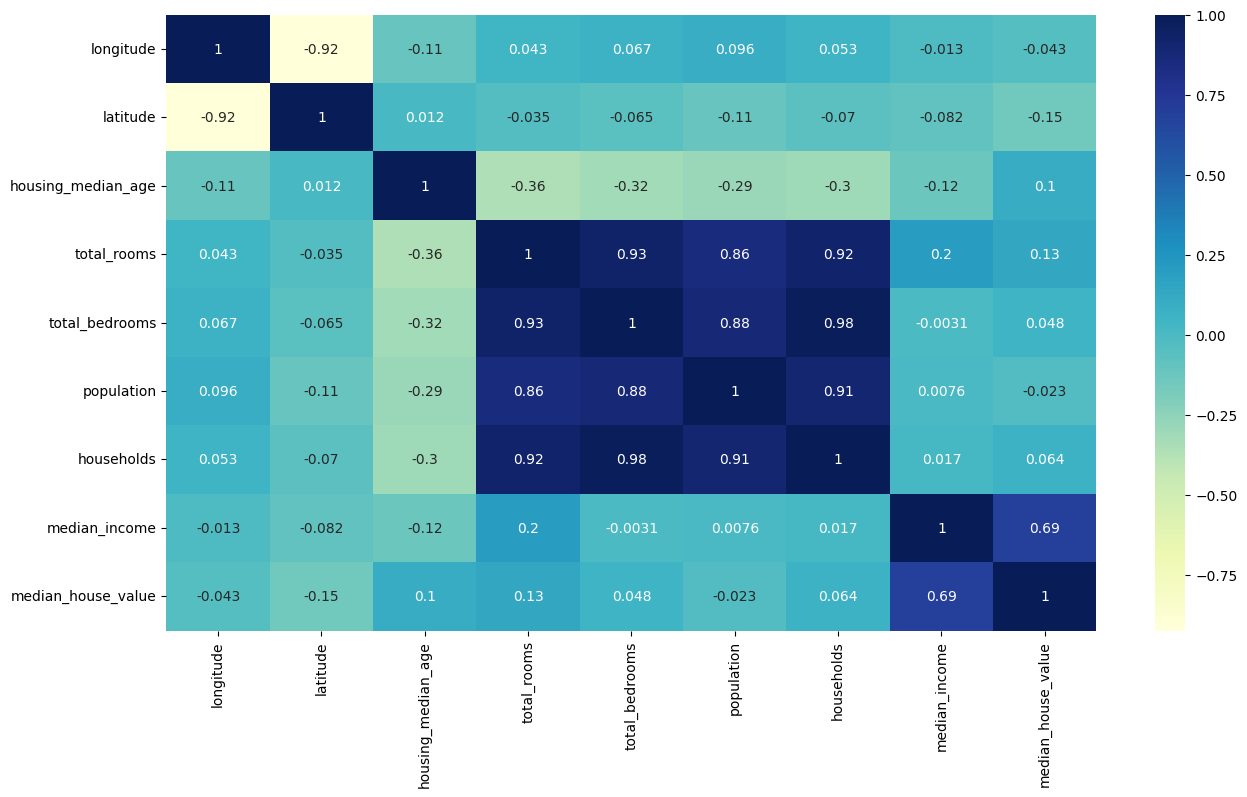

In [231]:
train_data_numeric = train_data.drop(columns=['ocean_proximity'])

plt.figure(figsize=(15,8))
sns.heatmap(train_data_numeric.corr(), annot=True, cmap="YlGnBu")
plt.show()
#======= END OF DATA EXPLORATION ========#

In [232]:
# GOAL to convert the categorical data on column (ocean_proximity) to binary
pd.get_dummies(train_data.ocean_proximity)
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)
# train_data = train_data.join(category_vars)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
4956,-118.31,34.01,52.0,2547.0,475.0,1417.0,444.0,1.8214,123200.0,True,False,False,False,False
1316,-121.80,38.00,34.0,2738.0,475.0,1316.0,459.0,3.5368,122500.0,False,True,False,False,False
12567,-121.42,38.54,18.0,2525.0,501.0,1726.0,468.0,2.3980,87600.0,False,True,False,False,False
3390,-118.35,34.21,39.0,1470.0,312.0,1047.0,284.0,3.2750,181400.0,True,False,False,False,False
11867,-121.06,40.23,23.0,1127.0,225.0,215.0,85.0,3.4844,143800.0,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18985,-121.94,38.27,35.0,10869.0,2226.0,9879.0,2152.0,2.5681,81300.0,False,True,False,False,False
9388,-122.51,37.89,27.0,2674.0,565.0,1233.0,547.0,3.4485,458300.0,False,False,False,True,False
9707,-121.65,36.67,52.0,2351.0,459.0,1169.0,439.0,2.8924,169600.0,True,False,False,False,False
9029,-118.78,34.05,28.0,1343.0,215.0,487.0,199.0,6.8300,500001.0,False,False,False,False,True


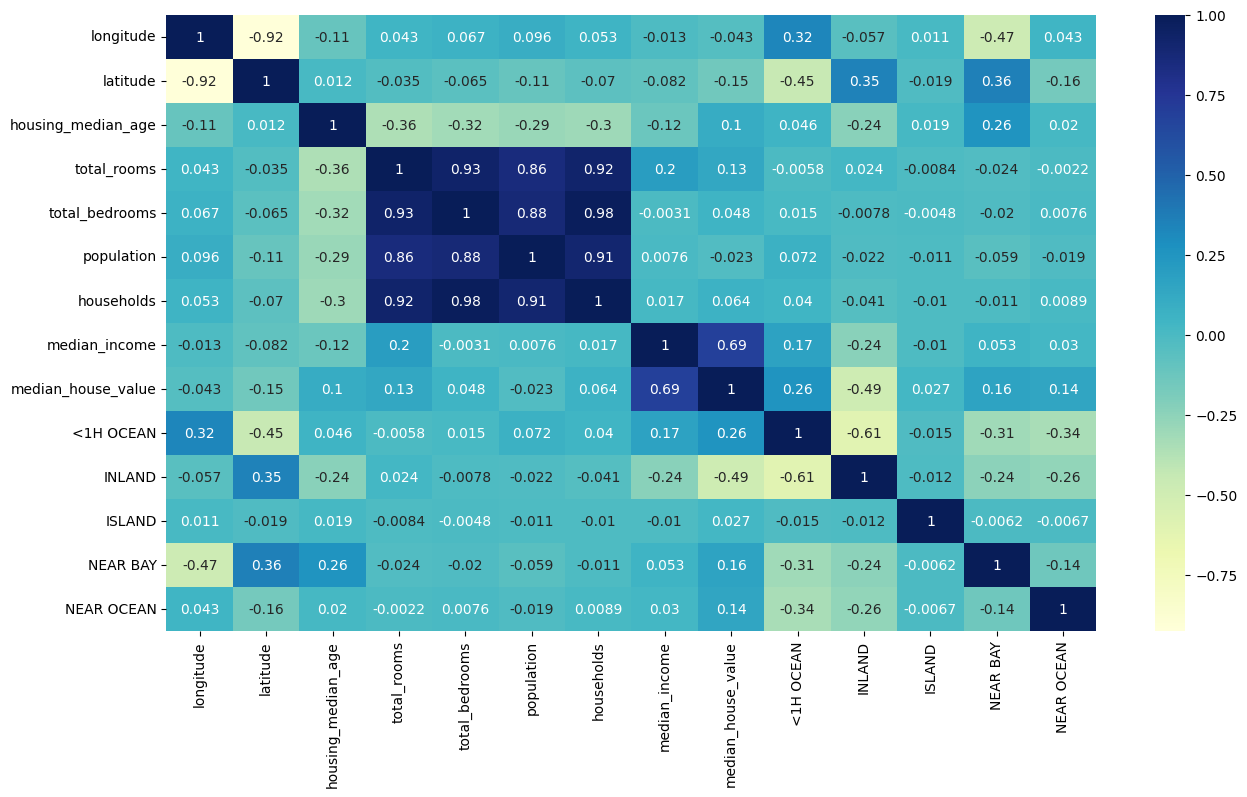

In [233]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")
plt.show()

<Axes: xlabel='latitude', ylabel='longitude'>

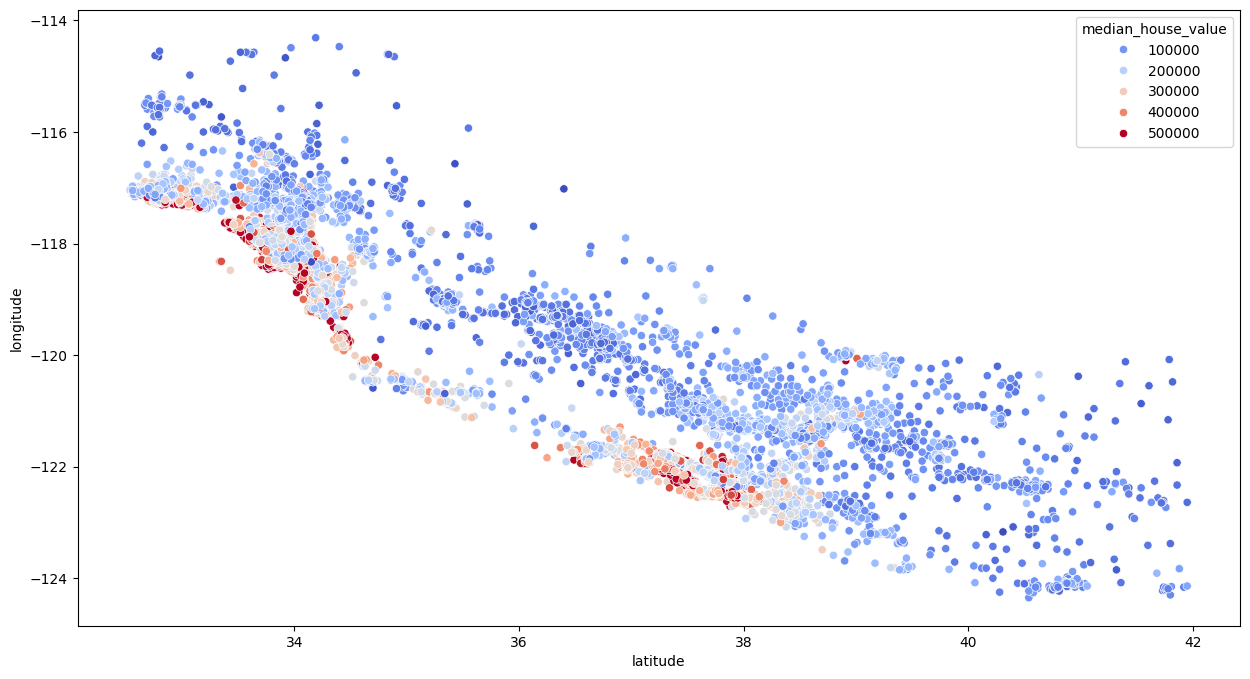

In [235]:
# Visualise the data on scatter plot
plt.figure(figsize=(15,8))
sns.scatterplot(x=train_data.latitude, y=train_data.longitude, hue=train_data.median_house_value, palette="coolwarm")

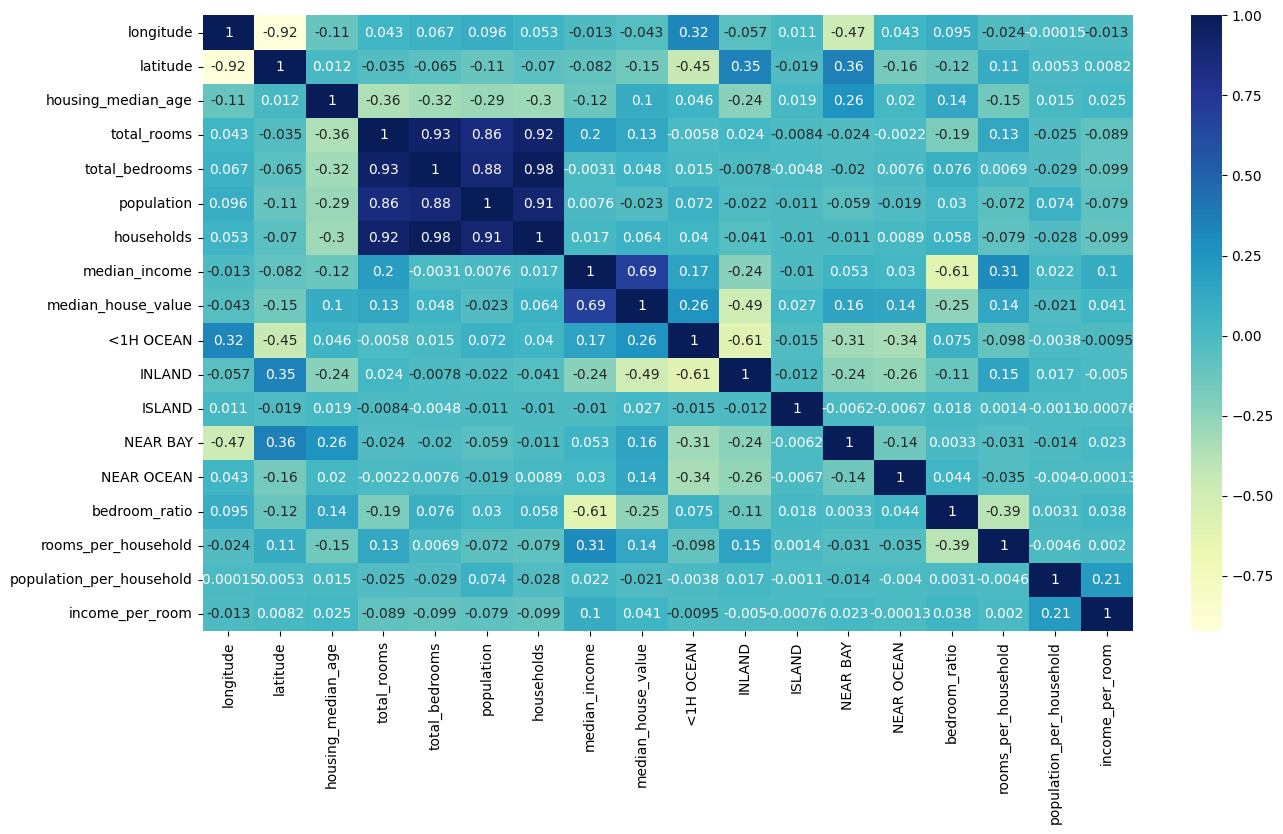

In [236]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['rooms_per_household'] = train_data['total_rooms'] / train_data['households']
train_data['population_per_household'] = train_data['population'] / train_data['households']
train_data['income_per_room'] = train_data['median_income'] / train_data['total_rooms']

plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")
plt.show()